In [1]:
import pandas
import numpy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot

In [2]:
#Open scaled data:
df_file_name = '/home/marti/jupy/jup_notebook/share/Team/scaled_data.csv'
scaled_data = pandas.read_csv(df_file_name, delimiter=',',index_col=0)


In [3]:
scaled_data

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,...,4c87674d-dd05-490d-a584-84490509f4d4.rna_seq.augmented_star_gene_counts.tsv,5cfb768f-7b49-4a72-92c9-d7502f5ba5b8.rna_seq.augmented_star_gene_counts.tsv,03ef99c7-55b7-4770-9eac-2ee007aa78ca.rna_seq.augmented_star_gene_counts.tsv,3ab1dfbc-ab83-446e-b680-cd6aec12b177.rna_seq.augmented_star_gene_counts.tsv,029a2c3e-0fd1-4cb4-9021-3947d28ca28d.rna_seq.augmented_star_gene_counts.tsv,ed41fe8b-fe2e-4bf3-91e3-2cf50ddcbc78.rna_seq.augmented_star_gene_counts.tsv,b9a5766c-e155-423e-a075-10fb14fe87df.rna_seq.augmented_star_gene_counts.tsv,a462c0f9-23d3-428b-9b61-e42cb6a68af1.rna_seq.augmented_star_gene_counts.tsv,0d3cfbc0-4420-48ed-a459-2e18d2ece5b6.rna_seq.augmented_star_gene_counts.tsv,d43517e2-e447-42cc-93e1-cbc9669ef4f1.rna_seq.augmented_star_gene_counts.tsv
ENSG00000001626.16,-0.667981,0.375156,0.655839,0.108740,0.868734,-0.641129,0.428405,-0.870485,-0.528776,0.634491,...,-0.306701,-0.814577,-0.675406,-0.390213,0.520473,-0.686942,0.341151,0.315405,0.234808,-0.715043
ENSG00000002587.10,0.614897,0.570903,0.915728,0.023776,-0.190241,0.346002,0.483255,0.954841,0.966359,0.413219,...,0.526251,-0.210895,-0.348430,0.185681,0.189952,0.393044,0.896640,0.749310,0.288469,0.085603
ENSG00000002726.21,1.970417,2.099478,-0.710378,0.882967,0.097773,-0.373023,-0.325831,1.862487,1.628818,-0.475599,...,-0.445021,-0.567760,-0.479725,-0.767549,0.019907,-0.423261,-0.455486,-0.681016,0.775937,-0.459610
ENSG00000003249.15,1.422344,0.856106,0.489451,1.188984,0.443431,1.686741,1.510567,1.182376,1.059196,-0.317317,...,0.307732,0.398737,0.370919,0.555645,0.321994,0.247836,0.126748,0.469801,0.549783,0.288388
ENSG00000003989.18,0.603052,0.451167,0.932766,-0.370804,1.169632,-0.337921,1.986231,1.092944,0.672852,0.736763,...,-0.156062,0.336920,0.719432,0.202713,0.369987,0.194420,0.390353,-0.134390,0.660113,-0.378071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000287269.1,-0.979703,-1.146335,-0.908360,-0.817128,-1.041924,-0.696107,-0.639976,-0.815218,-1.476268,0.730920,...,-0.338068,-0.419995,-0.766041,-0.388308,-0.784471,0.113918,-0.903626,-0.185304,-0.535244,-0.497009
ENSG00000287458.1,-1.103453,-1.228070,-1.264288,-0.817128,-0.793161,-1.044655,-1.031682,-1.084223,-0.865561,1.470921,...,-0.884609,-0.570020,-0.890792,-0.785070,-1.247369,-0.824947,-1.208169,-0.893392,-0.749459,-1.008510
ENSG00000287580.1,-0.552221,-0.373382,0.082590,-0.072031,-0.902075,-0.058313,-0.413577,-0.411308,-0.595277,0.770915,...,-0.294059,-0.041962,-0.483907,-0.633943,-0.811144,-0.558982,-1.208169,0.160418,-0.163420,-0.093350
ENSG00000288662.1,-1.381773,-1.365740,-1.264288,-0.817128,-0.406862,-1.044655,-1.292793,-0.466640,-1.476268,-0.498668,...,-0.884609,-0.893942,-1.031352,-1.037241,-1.247369,-0.957048,-1.208169,-0.893392,-0.888045,-1.008510


In [4]:
#Cluster label:
cluster_file_name = '/home/marti/jupy/jup_notebook/share/Team/cluster_labs.csv'
cluster_lab = pandas.read_csv(cluster_file_name,index_col=0)

In [45]:
d= cluster_lab['x'].to_numpy()
d

array([1, 1, 1, ..., 3, 3, 3])

In [46]:
#Generate the array:
T_scaled_data = scaled_data.transpose()
X = T_scaled_data.to_numpy()
y = cluster_lab['x'].to_numpy()

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
y

array([1, 1, 1, ..., 3, 3, 3])

In [48]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


Text(0.5, 1.0, 'Random Forest Feature Importances')

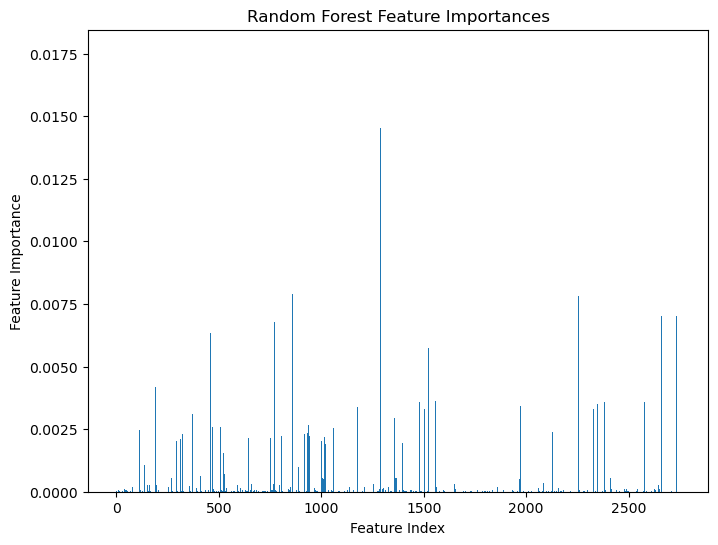

In [9]:
feature_importances = clf.feature_importances_
# Create a bar chart to visualize feature importances
matplotlib.pyplot.figure(figsize=(8, 6))
matplotlib.pyplot.bar(range(len(feature_importances)), feature_importances)
matplotlib.pyplot.xlabel('Feature Index')
matplotlib.pyplot.ylabel('Feature Importance')
matplotlib.pyplot.title('Random Forest Feature Importances')

In [17]:
print(len(feature_importances))
print(len(scaled_data.index))

2750
2750


In [18]:
feature_dic = {'Genes':scaled_data.index,
           'Feature nº':feature_importances
    
}
feature = pandas.DataFrame(feature_dic)

In [29]:
#feature.set_index('Genes',inplace=True)
feature.loc[['ENSG00000001626.16','ENSG00000002587.10']]

,Feature nº
Genes,
ENSG00000001626.16,0.000000
ENSG00000002587.10,0.000011


In [23]:
feature_sort = feature.sort_values(by="Feature nº",ascending=False)
feature_sort

,Feature nº
Genes,
ENSG00000278818.1,0.017571
ENSG00000137699.17,0.016866
ENSG00000186081.12,0.014534
ENSG00000279530.2,0.014086
ENSG00000134917.10,0.012000
...,...
ENSG00000198535.5,0.000000
ENSG00000198483.13,0.000000
ENSG00000198417.7,0.000000


In [67]:
#Generate the array:

result = []
n_genes = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,35,40,50,60,70,80,90,100,150,200]
for loop in n_genes:
    data = scaled_data.loc[feature_sort.iloc[:loop].index]
    
    T_scaled_data = data.transpose()
    X = T_scaled_data.to_numpy()
    y = cluster_lab['x'].to_numpy()
    
    # Split the dataset into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    
    #Safe accuracy values
    result.append(accuracy)
    
    
df_final=pandas.DataFrame(result,index=n_genes)


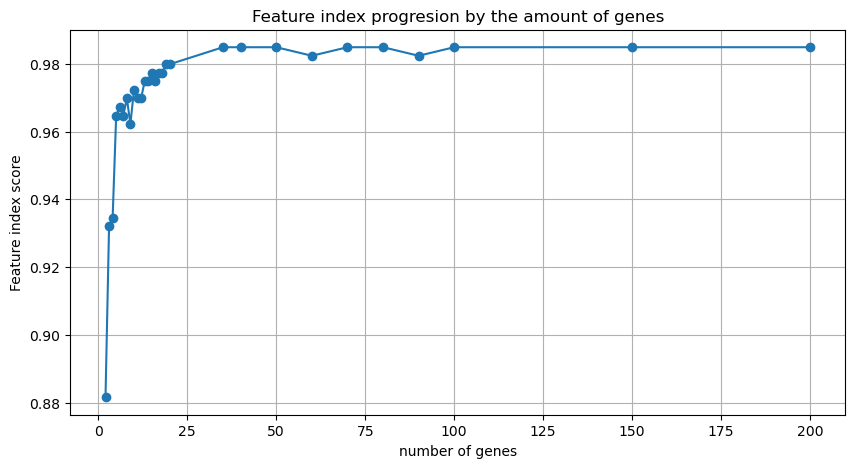

In [68]:
# Plot reachability distances
matplotlib.pyplot.figure(figsize=(10, 5))
matplotlib.pyplot.plot(n_genes,result, marker='o')
matplotlib.pyplot.xlabel('number of genes')
matplotlib.pyplot.ylabel('Feature index score')
matplotlib.pyplot.title('Feature index progresion by the amount of genes')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

In [69]:
result

[0.8816120906801007,
 0.9319899244332494,
 0.9345088161209067,
 0.964735516372796,
 0.9672544080604534,
 0.964735516372796,
 0.9697732997481109,
 0.9622166246851386,
 0.9722921914357683,
 0.9697732997481109,
 0.9697732997481109,
 0.9748110831234257,
 0.9748110831234257,
 0.9773299748110831,
 0.9748110831234257,
 0.9773299748110831,
 0.9773299748110831,
 0.9798488664987406,
 0.9798488664987406,
 0.9848866498740554,
 0.9848866498740554,
 0.9848866498740554,
 0.982367758186398,
 0.9848866498740554,
 0.9848866498740554,
 0.982367758186398,
 0.9848866498740554,
 0.9848866498740554,
 0.9848866498740554]

In [70]:
df_final

,0
2,0.881612
3,0.931990
4,0.934509
5,0.964736
6,0.967254
7,0.964736
8,0.969773
9,0.962217
10,0.972292
11,0.969773


In [72]:
A = list(range(2,30,4))
A

[2, 6, 10, 14, 18, 22, 26]